## **Estudo de Classificação**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
data = pd.read_csv('../datasets/plants_model.csv')
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2


### **Criação de Novas Features**

Experiencia Indicada (baseado em soil, sunlight)
- Experiente
- Amador
- Novato

Disponibilidade (baseado em water_category, sunlight)
- Alta
- Média
- Baixa


### **Classificando Dificuldade do Solo**

In [3]:
list(data['soil'].unique())

['Peat soils', 'Sandy soils', 'Loamy soils', 'Silty and clay soils']

- Loamy soils – (fácil)
    - Solo equilibrado, boa drenagem e retenção, fácil de corrigir e manter.
- Peat soils – (moderado)
    - Retém bem umidade, mas pode encharcar e tem pH ácido. Requer ajustes.
- Sandy soils – (moderado)
    - Fácil de trabalhar, mas seca rápido e perde nutrientes fácil. Precisa de manutenção constante.
- Silty and clay soils – (difícil)
    - Tendem a compactar e encharcar. Exigem bastante correção e cuidado com drenagem.

In [4]:
soil_difficulty = {
    'Loamy soils': 'easy',
    'Peat soils': 'medium',
    'Sandy soils': 'medium',
    'Silty and clay soils': 'hard'
}

data['soil_diff'] = data['soil'].map(soil_difficulty)
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2,medium
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0,medium
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0,easy
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2,hard


### **Classificando Dificuldade da Incidência Solar**

In [5]:
list(data['sunlight'].unique())

['Partial shade', 'Full sun', 'Full sun or partial shade']

- Partial shade - (fácil)
    - Ambiente estável, menos risco de desidratação ou queimadura. Ideal pra plantas tropicais como samambaias.

- Full sun - (difícil)
    - Precisa de rega constante, risco alto de queimadura, exige espécies bem adaptadas. Mudanças no clima afetam muito.

- Full sun or partial shade - (moderado)
    - Mais versátil, mas ainda exige atenção à adaptação da planta ao ambiente. Pode sofrer em extremos de calor ou sombra.

In [6]:
sunlight_difficulty = {
    'Full sun': 'hard',
    'Partial shade': 'easy',
    'Full sun or partial shade': 'medium'
}

data['sunlight_diff'] = data['sunlight'].map(sunlight_difficulty)
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2,medium,easy
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0,medium,hard
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy,easy
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0,easy,hard
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2,hard,easy


### **Classificando Dificuldade da Frequência de Rega**

In [7]:
list(data['water_category'].unique())

['weekly', '7-10 days', '2-4 weeks']

In [8]:
water_difficulty = {
    'weekly': 'hard',
    '7-10 days': 'medium',
    '2-4 weeks': 'easy',
}

data['water_diff'] = data['water_category'].map(water_difficulty)
data.head()

,family,categories,origin,climate,name,water_category,venomous,ind_pets,size,ind_apartment,soil,sunlight,water_category_code,size_code,soil_code,sunlight_code,soil_diff,sunlight_diff,water_diff
0,Marantaceae,Hanging,Brazil,Tropical,Herringbone,weekly,0,1,small,1,Peat soils,Partial shade,2,2,1,2,medium,easy,hard
1,Arecaceae,Palm,Mexico,Tropical,Bella palm,weekly,0,1,small,1,Sandy soils,Full sun,2,2,2,0,medium,hard,hard
2,Araliaceae,Aralia,Asia,Tropical,Fabian Aralia,weekly,0,1,medium,1,Loamy soils,Partial shade,2,1,0,2,easy,easy,hard
3,Liliaceae,Sansevieria,South Africa,Tropical,Snake plant,weekly,1,0,small,1,Loamy soils,Full sun,2,2,0,0,easy,hard,hard
4,Araceae,Philodendron,Central America,Tropical,Parlor ivy,weekly,1,0,small,1,Silty and clay soils,Partial shade,2,2,3,2,hard,easy,hard


## **Codificando as Dificuldades**

In [9]:
data_points = data.drop(columns=['family', 'categories', 'origin', 'climate', 'water_category', 'soil', 'sunlight', 'water_category_code', 'soil_code', 'sunlight_code'])
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff
0,Herringbone,0,1,small,1,2,medium,easy,hard
1,Bella palm,0,1,small,1,2,medium,hard,hard
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard
3,Snake plant,1,0,small,1,2,easy,hard,hard
4,Parlor ivy,1,0,small,1,2,hard,easy,hard


In [10]:
data_points['soil_diff_code'] = data_points['soil_diff'].map({'easy': 1, 'medium': 2, 'hard': 3})
data_points['sunlight_diff_code'] = data_points['sunlight_diff'].map({'easy': 1, 'medium': 2, 'hard': 3})
data_points['water_diff_code'] = data_points['water_diff'].map({'easy': 1, 'medium': 2, 'hard': 3})
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code
0,Herringbone,0,1,small,1,2,medium,easy,hard,2,1,3
1,Bella palm,0,1,small,1,2,medium,hard,hard,2,3,3
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,1,1,3
3,Snake plant,1,0,small,1,2,easy,hard,hard,1,3,3
4,Parlor ivy,1,0,small,1,2,hard,easy,hard,3,1,3


### **Definindo Nível Indicado de Experiência e Disponibilidade**

In [11]:
def define_experience_level(row):
    exp_points = row['soil_diff_code'] + row['sunlight_diff_code'] 
    
    if exp_points <= 2:
        return 'Begginer'
    elif 3 <= exp_points <= 4:
        return 'Amateur'
    else:
        return 'Experienced'


data_points['experience_level'] = data_points.apply(define_experience_level, axis=1)
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level
0,Herringbone,0,1,small,1,2,medium,easy,hard,2,1,3,Amateur
1,Bella palm,0,1,small,1,2,medium,hard,hard,2,3,3,Experienced
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,1,1,3,Begginer
3,Snake plant,1,0,small,1,2,easy,hard,hard,1,3,3,Amateur
4,Parlor ivy,1,0,small,1,2,hard,easy,hard,3,1,3,Amateur


In [12]:
def define_disponibility_level(row):
    disp_points = row['water_diff_code'] + row['sunlight_diff_code'] 
    
    if disp_points <= 3:
        return 'Low'
    elif 3 < disp_points < 5:
        return 'Medium'
    else:
        return 'High'
    
data_points['disponibility_level'] = data_points.apply(define_disponibility_level, axis=1)
data_points.head()

,name,venomous,ind_pets,size,ind_apartment,size_code,soil_diff,sunlight_diff,water_diff,soil_diff_code,sunlight_diff_code,water_diff_code,experience_level,disponibility_level
0,Herringbone,0,1,small,1,2,medium,easy,hard,2,1,3,Amateur,Medium
1,Bella palm,0,1,small,1,2,medium,hard,hard,2,3,3,Experienced,High
2,Fabian Aralia,0,1,medium,1,1,easy,easy,hard,1,1,3,Begginer,Medium
3,Snake plant,1,0,small,1,2,easy,hard,hard,1,3,3,Amateur,High
4,Parlor ivy,1,0,small,1,2,hard,easy,hard,3,1,3,Amateur,Medium


In [13]:
data_info = data_points.drop(columns=['venomous', 'soil_diff', 'soil_diff_code', 'sunlight_diff', 'sunlight_diff_code', 'water_diff', 'water_diff_code'])
data_info.to_csv('../datasets/plants_info.csv', index=False)
data_info.head()

,name,ind_pets,size,ind_apartment,size_code,experience_level,disponibility_level
0,Herringbone,1,small,1,2,Amateur,Medium
1,Bella palm,1,small,1,2,Experienced,High
2,Fabian Aralia,1,medium,1,1,Begginer,Medium
3,Snake plant,0,small,1,2,Amateur,High
4,Parlor ivy,0,small,1,2,Amateur,Medium


## **Agrupamento das Plantas**

### **Codificação e Normalização dos Dados**

In [14]:
data_coded = data_info.copy()  

data_coded['experience_level_code'] = data_coded['experience_level'].map({'Begginer': 1, 'Amateur': 2, 'Experienced': 3})
data_coded['disponibility_level_code'] = data_coded['disponibility_level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data_coded.drop(columns=['size', 'experience_level', 'disponibility_level'], inplace=True)
data_coded.head()


,name,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,Herringbone,1,1,2,2,2
1,Bella palm,1,1,2,3,3
2,Fabian Aralia,1,1,1,1,2
3,Snake plant,0,1,2,2,3
4,Parlor ivy,0,1,2,2,2


In [15]:
data_ml = data_coded.copy()
data_ml.drop(columns=['name'], inplace=True)

data_ml.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1,1,2,2,2
1,1,1,2,3,3
2,1,1,1,1,2
3,0,1,2,2,3
4,0,1,2,2,2


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_ml_normalized = scaler.fit_transform(data_ml)

data_ml_normalized = pd.DataFrame(data_ml_normalized, columns=data_ml.columns)
data_ml_normalized

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,1.0,1.0,0.666667,0.5,0.5
1,1.0,1.0,0.666667,1.0,1.0
2,1.0,1.0,0.333333,0.0,0.5
3,0.0,1.0,0.666667,0.5,1.0
4,0.0,1.0,0.666667,0.5,0.5
5,1.0,1.0,0.666667,1.0,1.0
6,1.0,1.0,0.333333,1.0,1.0
7,0.0,0.0,0.000000,0.5,1.0
8,0.0,0.0,1.000000,1.0,0.5
9,1.0,0.0,0.000000,0.5,1.0


### **Aplicando o Modelo**

Text(0.5, 1.0, 'Elbow Method')

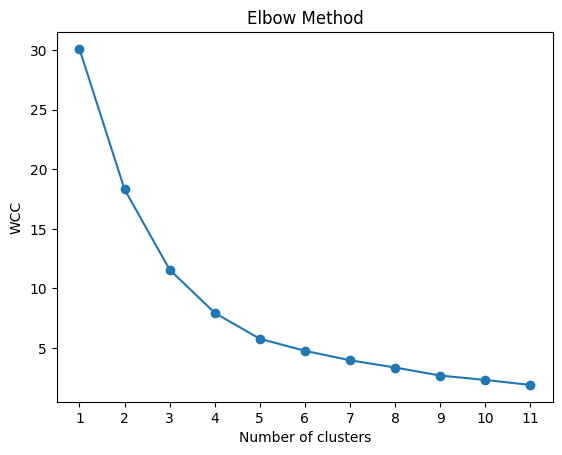

In [17]:
from sklearn.cluster import KMeans

wcss = [] 

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10, max_iter=1000)
    kmeans.fit(data_ml_normalized)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 12), wcss, marker='o')
plt.xticks(range(1, 12))
plt.xlabel('Number of clusters')
plt.ylabel('WCC')
plt.title('Elbow Method')


A escolha do K = 5, tem como base o cenário de que:

Mesmo que se tenham grupos um pouco mais despersos, a variedade oferecida para o usuário, no final, vai ser maior, e no contexto da aplicação faz mais sentido

In [18]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pred = kmeans.fit_predict(data_ml_normalized)

data_ml_normalized['kmeans_group'] = kmeans_pred
data_ml_normalized.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
0,1.0,1.0,0.666667,0.5,0.5,1
1,1.0,1.0,0.666667,1.0,1.0,2
2,1.0,1.0,0.333333,0.0,0.5,1
3,0.0,1.0,0.666667,0.5,1.0,0
4,0.0,1.0,0.666667,0.5,0.5,0


### **Resultados Agrupamento**

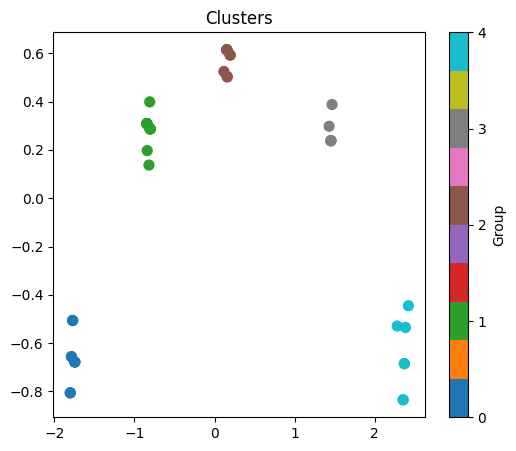

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_ml_normalized)

plt.figure(figsize=(6, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_ml_normalized['kmeans_group'], cmap='tab10', s=50)
plt.colorbar(label='Group', ticks=range(n_clusters))
plt.title('Clusters')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_ml_normalized, data_ml_normalized['kmeans_group'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6834357915475328


In [21]:
data_grouped = data_ml_normalized.copy()
data_grouped['name'] = data_coded['name']
data_grouped.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group,name
0,1.0,1.0,0.666667,0.5,0.5,1,Herringbone
1,1.0,1.0,0.666667,1.0,1.0,2,Bella palm
2,1.0,1.0,0.333333,0.0,0.5,1,Fabian Aralia
3,0.0,1.0,0.666667,0.5,1.0,0,Snake plant
4,0.0,1.0,0.666667,0.5,0.5,0,Parlor ivy


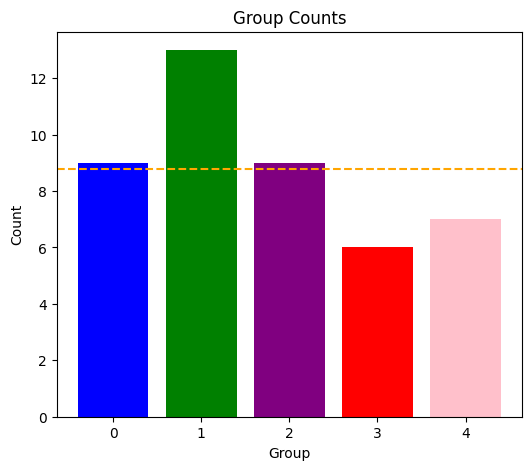

In [22]:
plt.figure(figsize=(6, 5))

colors = ['blue', 'green', 'purple', 'red', 'pink']
group_counts = data_grouped['kmeans_group'].value_counts()
mean_count = group_counts.mean()


plt.bar(group_counts.index, group_counts, color=[colors[i] for i in group_counts.index])
plt.axhline(mean_count, color='orange', linestyle='--', label='Mean Count')

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Group Counts')

plt.xticks(group_counts.index)
plt.show()

A maior parte das plantas agrupadas se encontram no cluster 1 (13), e a menor quantidade no cluster 3 (6).

A partir dessas informações, definimos que a quantidade de plantas a serem indicadas para o usuário seria 4.

### **Analise e Nomeação dos Grupos**

In [23]:
group_0 = data_grouped[data_grouped['kmeans_group'] == 0]
group_1 = data_grouped[data_grouped['kmeans_group'] == 1]
group_2 = data_grouped[data_grouped['kmeans_group'] == 2]
group_3 = data_grouped[data_grouped['kmeans_group'] == 3]
group_4 = data_grouped[data_grouped['kmeans_group'] == 4]

{'big': np.int64(0),
 'medium': np.int64(1),
 'small': np.int64(2),
 'very big': np.int64(3)}

In [50]:
data_grouped['size_code'].value_counts()

size_code
0.666667    17
0.333333    14
0.000000    12
1.000000     1
Name: count, dtype: int64

In [48]:
data_grouped['experience_level_code'].value_counts()

experience_level_code
0.5    29
1.0    14
0.0     1
Name: count, dtype: int64

In [51]:
data_grouped['disponibility_level_code'].value_counts()

disponibility_level_code
0.5    24
1.0    15
0.0     5
Name: count, dtype: int64

In [38]:
group_0.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,9.0,9.0,9.000000,9.0,9.000000,9.0
mean,0.0,1.0,0.555556,0.5,0.500000,0.0
std,0.0,0.0,0.166667,0.0,0.353553,0.0
min,0.0,1.0,0.333333,0.5,0.000000,0.0
25%,0.0,1.0,0.333333,0.5,0.500000,0.0
50%,0.0,1.0,0.666667,0.5,0.500000,0.0
75%,0.0,1.0,0.666667,0.5,0.500000,0.0
max,0.0,1.0,0.666667,0.5,1.000000,0.0


**Plantas do Grupo 0** 
- Não indicadas para Pet (venenosas)
- Casa ou Apartamento
- Médias 
- Amador
- Média Disponibilidade

In [41]:
group_1.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,13.0,13.0,13.000000,13.000000,13.000000,13.0
mean,1.0,1.0,0.487179,0.500000,0.461538,1.0
std,0.0,0.0,0.172958,0.204124,0.138675,0.0
min,1.0,1.0,0.333333,0.000000,0.000000,1.0
25%,1.0,1.0,0.333333,0.500000,0.500000,1.0
50%,1.0,1.0,0.333333,0.500000,0.500000,1.0
75%,1.0,1.0,0.666667,0.500000,0.500000,1.0
max,1.0,1.0,0.666667,1.000000,0.500000,1.0


**Plantas do Grupo 1**
- Indicadas para Pets (não venenosas)
- Casa ou Apartamento
- Pequenas e Médias 
- Amador
- Alta Disponibilidade

In [42]:
group_2.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,9.0,9.0,9.000000,9.000000,9.0,9.0
mean,1.0,1.0,0.518519,0.833333,1.0,2.0
std,0.0,0.0,0.175682,0.250000,0.0,0.0
min,1.0,1.0,0.333333,0.500000,1.0,2.0
25%,1.0,1.0,0.333333,0.500000,1.0,2.0
50%,1.0,1.0,0.666667,1.000000,1.0,2.0
75%,1.0,1.0,0.666667,1.000000,1.0,2.0
max,1.0,1.0,0.666667,1.000000,1.0,2.0


**Plantas do Grupo 2**
- Indicadas para Pets (não venenosas)
- Casa ou Apartamento
- Médias
- Experiente
- Alta Disponibilidade

In [43]:
group_3.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,6.0,6.0,6.0,6.000000,6.000000,6.0
mean,1.0,0.0,0.0,0.916667,0.666667,3.0
std,0.0,0.0,0.0,0.204124,0.258199,0.0
min,1.0,0.0,0.0,0.500000,0.500000,3.0
25%,1.0,0.0,0.0,1.000000,0.500000,3.0
50%,1.0,0.0,0.0,1.000000,0.500000,3.0
75%,1.0,0.0,0.0,1.000000,0.875000,3.0
max,1.0,0.0,0.0,1.000000,1.000000,3.0


**Plantas do Grupo 3**
- Indicadas para Pets (não venenosas)
- 

In [44]:
group_4.describe()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group
count,7.0,7.0,7.000000,7.000000,7.000000,7.0
mean,0.0,0.0,0.142857,0.642857,0.500000,4.0
std,0.0,0.0,0.377964,0.243975,0.408248,0.0
min,0.0,0.0,0.000000,0.500000,0.000000,4.0
25%,0.0,0.0,0.000000,0.500000,0.250000,4.0
50%,0.0,0.0,0.000000,0.500000,0.500000,4.0
75%,0.0,0.0,0.000000,0.750000,0.750000,4.0
max,0.0,0.0,1.000000,1.000000,1.000000,4.0


## **Classificando um Novo Elemento**

### **Criando um Usuário Sintético**

Criação de um usuário sintético para a simulação de uma classificação e indicação do sistema

In [25]:
new_user = pd.DataFrame({
    'ind_pets': [0],
    'ind_apartment': [0],
    'size_code': [1],
    'experience_level_code': [1],
    'disponibility_level_code': [1],
})
new_user.head()

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,0,0,1,1,1


In [26]:
new_user_normalized = scaler.transform(new_user)
new_user_group = kmeans.predict(new_user_normalized)
new_user_group[0]  

c:\Users\carlo\OneDrive\Área de Trabalho\Faculdade\Projetos 6\indoorPlants\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


np.int32(4)

### **Classificando o Usuário**

In [27]:
new_user_normalized = pd.DataFrame(new_user_normalized, columns=new_user.columns)
new_user_normalized

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code
0,0.0,0.0,0.333333,0.0,0.0


In [28]:
plants_in_group = data_grouped[data_grouped['kmeans_group'] == new_user_group[0]]
plants_in_group

,ind_pets,ind_apartment,size_code,experience_level_code,disponibility_level_code,kmeans_group,name
7,0.0,0.0,0.0,0.5,1.0,4,Spineless yucca
8,0.0,0.0,1.0,1.0,0.5,4,Giant Candelabra tree
10,0.0,0.0,0.0,0.5,0.5,4,Fernleaf Philodendron
22,0.0,0.0,0.0,0.5,0.0,4,Dragon-tree Agave
27,0.0,0.0,0.0,0.5,0.5,4,Indian kale
38,0.0,0.0,0.0,1.0,1.0,4,Golden Trumpet
43,0.0,0.0,0.0,0.5,0.0,4,Blue Agave


In [29]:
from scipy.spatial.distance import cdist

new_plant_cluster = new_user_group[0]

cluster_plants = data_ml_normalized[data_ml_normalized['kmeans_group'] == new_plant_cluster].drop(columns=['kmeans_group'])

distances = cdist(new_user_normalized, cluster_plants, metric='euclidean')

distances_df = pd.DataFrame(distances.T, columns=['Distance'])
distances_df['Plant Index'] = cluster_plants.index
distances_df['Plant Name'] = data_grouped.loc[cluster_plants.index, 'name'].values
distances_df = distances_df.sort_values(by='Distance')


print(distances_df)

   Distance  Plant Index             Plant Name
3  0.600925           22      Dragon-tree Agave
6  0.600925           43             Blue Agave
4  0.781736           27            Indian kale
2  0.781736           10  Fernleaf Philodendron
0  1.166667            7        Spineless yucca
1  1.301708            8  Giant Candelabra tree
5  1.452966           38         Golden Trumpet


Adquirir as distancias entre cada planta existente e o novo usuário para realizar o calculo da porcentagem da compatibilidade,
que se baseia nas seguintes regras:

- Distance = 0.0 => Compatibility = 100%
- Distance = Max(Distance) => Compatibility = 0%

In [30]:
compatibility_percentage = round(100 - (distances_df['Distance'] / distances_df['Distance'].max() * 100),0)
distances_df['Compatibility Percentage'] = compatibility_percentage.astype(float)
distances_df

,Distance,Plant Index,Plant Name,Compatibility Percentage
3,0.600925,22,Dragon-tree Agave,59.0
6,0.600925,43,Blue Agave,59.0
4,0.781736,27,Indian kale,46.0
2,0.781736,10,Fernleaf Philodendron,46.0
0,1.166667,7,Spineless yucca,20.0
1,1.301708,8,Giant Candelabra tree,10.0
5,1.452966,38,Golden Trumpet,0.0


### **Resultado das Indicações**

Para indicação ao usuário final, consideramos apenas as 4 maiores compatibilidades maiores que 0%

In [31]:
compatibility_df = distances_df[distances_df['Compatibility Percentage'] > 0]
compatibility_df = compatibility_df.head(4)
compatibility_df

,Distance,Plant Index,Plant Name,Compatibility Percentage
3,0.600925,22,Dragon-tree Agave,59.0
6,0.600925,43,Blue Agave,59.0
4,0.781736,27,Indian kale,46.0
2,0.781736,10,Fernleaf Philodendron,46.0


In [32]:
import pickle

with open('../pickles/plant_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
with open('../pickles/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
